In [1]:
%matplotlib inline
import pandas as pd
import re # glob and re for regular expressions
import glob

In [2]:
#elsetry= decibel.groupby(['Date', 'Time']).agg({'Average':['mean']})
#elsetry.head()

In [47]:
path =r'C:\Pythondirectory\Data' # use your path
allFiles = glob.glob(path + "/Location1*.csv")
Location1 = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_ ,index_col=None, header= 0)
    list_.append(df)
Location1 = pd.concat(list_)
Location1['Location'] = "One"
Location1.head()

,Date,Time,Average,Peak,Location
0,2015-05-22,10:38:33,47.891774,51.783294,One
1,2015-05-22,10:38:33,48.094113,48.676894,One
2,2015-05-22,10:38:34,45.946596,46.133619,One
3,2015-05-22,10:38:34,49.632993,50.360566,One
4,2015-05-22,10:38:34,45.902949,48.295272,One


In [48]:
Location1["Hour"]=Location1['Time'].str[0:2] # to put the substring part of hours for am vs pm
Location1[["Hour"]]= Location1[["Hour"]].astype(float) # converting from string to float
Location1.dtypes # to check data types, here it will convert to float from string in the previous command

Date         object
Time         object
Average     float64
Peak        float64
Location     object
Hour        float64
dtype: object

In [49]:
Location1["Daytime"]= "AM"
Location1["Daytime"][Location1["Hour"] >12]= "PM" # This execution gives woarning, however, it works. :D # pretty easy to R
Location1.tail() # to check whether "PM" was inserted or not

C:\Users\Debmalya\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


,Date,Time,Average,Peak,Location,Hour,Daytime
2377,2015-05-27,17:20:35,41.161390,42.066375,One,17,PM
2378,2015-05-27,17:20:35,35.353648,38.025032,One,17,PM
2379,2015-05-27,17:20:35,43.794156,44.514764,One,17,PM
2380,2015-05-27,17:20:36,41.551414,43.460379,One,17,PM
2381,2015-05-27,17:20:36,31.460575,39.297810,One,17,PM


In [50]:
path =r'C:\Pythondirectory\Data' # use your path
allFiles = glob.glob(path + "/Location2*.csv")
Location2 = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_ ,index_col=None, header= 0)
    list_.append(df)
Location2 = pd.concat(list_)
Location2['Location'] = "Two"

In [51]:
Location2["Hour"]=Location2['Time'].str[0:2] 
Location2[["Hour"]]= Location2[["Hour"]].astype(float) 
#Location2.dtypes 
Location2["Daytime"]= "AM"
Location2["Daytime"][Location2["Hour"] >12]= "PM" 
#Location2.tail() 

C:\Users\Debmalya\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [52]:
path =r'C:\Pythondirectory\Data' # use your path
allFiles = glob.glob(path + "/Location3*.csv")
Location3 = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_ ,index_col=None, header= 0)
    list_.append(df)
Location3 = pd.concat(list_)
Location3['Location'] = "Three"

In [53]:
Location3["Hour"]=Location3['Time'].str[0:2] 
Location3[["Hour"]]= Location3[["Hour"]].astype(float) 
#Location2.dtypes 
Location3["Daytime"]= "AM"
Location3["Daytime"][Location3["Hour"] >12]= "PM" 
#Location3.tail() 

C:\Users\Debmalya\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [54]:
path =r'C:\Pythondirectory\Data' # use your path
allFiles = glob.glob(path + "/Location4*.csv")
Location4 = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_ ,index_col=None, header= 0)
    list_.append(df)
Location4 = pd.concat(list_)
Location4['Location'] = "Four"

In [55]:
Location4["Hour"]=Location4['Time'].str[0:2] 
Location4[["Hour"]]= Location4[["Hour"]].astype(float) 
#Location4.dtypes 
Location4["Daytime"]= "AM"
Location4["Daytime"][Location4["Hour"] >12]= "PM" 
#Location4.tail() 

C:\Users\Debmalya\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [57]:
# To join them together after indexing has been done
temp= [Location1, Location2, Location3, Location4]
alldata= pd.concat(temp, ignore_index= True)
#alldata.head()

In [59]:
min_sum= alldata.groupby(["Location", 'Date', "Time", "Daytime"], as_index=False).agg(
                      {'Average':['mean'],'Peak':["max"]})
#min_sum.head()

,Location,Date,Time,Daytime,Average,Peak
,,,,,mean,max
0,Four,2015-05-22,11:13:33,AM,55.307869,56.527686
1,Four,2015-05-22,11:13:34,AM,56.135946,58.829284
2,Four,2015-05-22,11:13:35,AM,54.573595,56.211738
3,Four,2015-05-22,11:13:36,AM,55.277871,57.617817
4,Four,2015-05-22,11:13:37,AM,58.118084,60.970466


In [60]:
session_summary= alldata.groupby(["Location", 'Date', "Daytime"], as_index=True).agg(
                      {'Average':['mean'],'Peak':["max"]})
session_summary.head()

Average       Peak
                                  mean        max
Location Date       Daytime                      
Four     2015-05-22 AM       53.904240  77.325401
                    PM       55.459547  71.005885
         2015-05-27 AM       54.820462  74.501106
                    PM       56.328459  79.024861
One      2015-05-22 AM       45.659235  71.117488

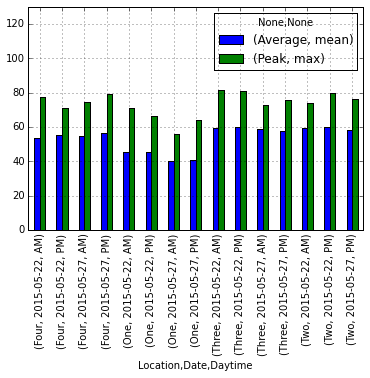

In [61]:
session_summary.plot(kind= "bar", ylim= [0,130])

In [62]:
Location_summary= alldata.groupby(["Location"], as_index=True).agg(
                      {'Average':['mean'],'Peak':["max"]})
Location_summary

,Average,Peak
,mean,max
Location,,
Four,55.129952,79.024861
One,42.973658,71.117488
Three,59.034305,81.476979
Two,59.383175,79.578991


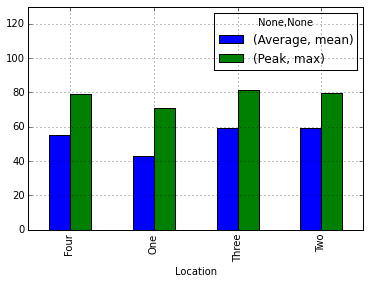

In [63]:
Location_summary.plot(kind= "bar", ylim= [0,130])